# 导入相关库

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns # matplotlib的一个扩展库
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['font.serif'] = ['KaiTi']

# 导入数据

In [2]:
data = pd.read_csv('./datas/happiness_train_complete.csv', encoding='gbk')
test = pd.read_csv('./datas/happiness_test_complete.csv', encoding='gbk')
data.head()

,id,happiness,survey_type,province,city,county,survey_time,gender,birth,nationality,...,neighbor_familiarity,public_service_1,public_service_2,public_service_3,public_service_4,public_service_5,public_service_6,public_service_7,public_service_8,public_service_9
0,1,4,1,12,32,59,2015/8/4 14:18,1,1959,1,...,4,50,60,50,50,30.0,30,50,50,50
1,2,4,2,18,52,85,2015/7/21 15:04,1,1992,1,...,3,90,70,70,80,85.0,70,90,60,60
2,3,4,2,29,83,126,2015/7/21 13:24,2,1967,1,...,4,90,80,75,79,80.0,90,90,90,75
3,4,5,2,10,28,51,2015/7/25 17:33,2,1943,1,...,3,100,90,70,80,80.0,90,90,80,80
4,5,4,1,7,18,36,2015/8/10 9:50,2,1994,1,...,2,50,50,50,50,50.0,50,50,50,50


In [3]:
# 查看数据的维度
print(data.shape) # (8000, 140)
print(test.shape) # (2968, 139)

(8000, 140)
(2968, 139)


In [4]:
# 官方需要的文件：提交结果为csv文件，其中包含id和happiness的预测值两列。看来y值是happiness，那测试集应该是少y了
# 查看happiness，结果发现有个-8，官方指出-8代表无法回答。说不上来是幸福还是不幸福，先去除
data = data[data['happiness'] != -8]

# 异常值与缺失值处理

In [5]:
data.describe()

,id,happiness,survey_type,province,city,county,gender,birth,nationality,religion,...,neighbor_familiarity,public_service_1,public_service_2,public_service_3,public_service_4,public_service_5,public_service_6,public_service_7,public_service_8,public_service_9
count,7988.000000,7988.000000,7988.000000,7988.000000,7988.000000,7988.00000,7988.000000,7988.000000,7988.000000,7988.000000,...,7988.000000,7988.000000,7988.000000,7988.000000,7988.000000,7988.000000,7988.000000,7988.000000,7988.000000,7988.000000
mean,4001.603906,3.867927,1.405984,15.161617,42.583250,70.64647,1.530295,1964.702303,1.374061,0.776915,...,3.723335,70.840260,68.214572,62.787932,66.346895,62.821670,67.090761,66.120931,65.651352,67.188408
std,2309.864374,0.818717,0.491112,8.915476,27.184344,38.73718,0.499113,16.848414,1.529899,1.053975,...,1.142888,21.156018,20.500041,24.723590,22.028845,23.440032,21.566658,23.065318,23.803476,22.472591
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1921.000000,-8.000000,-8.000000,...,-8.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000
25%,2001.750000,4.000000,1.000000,7.000000,18.000000,37.00000,1.000000,1952.000000,1.000000,1.000000,...,3.000000,60.000000,60.000000,50.000000,60.000000,55.750000,60.000000,60.000000,60.000000,60.000000
50%,4003.500000,4.000000,1.000000,15.000000,42.000000,73.00000,2.000000,1965.000000,1.000000,1.000000,...,4.000000,79.500000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
75%,6002.250000,4.000000,2.000000,22.000000,65.000000,104.00000,2.000000,1977.000000,1.000000,1.000000,...,5.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
max,8000.000000,5.000000,2.000000,31.000000,89.000000,134.00000,2.000000,1997.000000,8.000000,1.000000,...,5.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


通过数据描述可知：

    离散变量中存在异常值，如happiness,nationality等为负值。
    连续变量中存在异常值，如income,family_m为负值，且存在离群点，如floor_area为3等。

In [6]:
# 检查是否有缺失值,结果发现缺失值还是挺多的
def checkNone(data):
    check = data.isnull().sum().sort_values(ascending=False)
    return check[check>0]
    
checkNone(data)

edu_other          7985
invest_other       7959
property_other     7922
join_party         7165
s_work_status      5428
s_work_type        5428
work_type          5042
work_status        5042
work_yr            5042
work_manage        5042
edu_yr             1970
marital_now        1768
s_work_exper       1716
s_hukou            1716
s_political        1716
s_birth            1716
s_edu              1716
s_income           1716
edu_status         1120
minor_child        1065
marital_1st         827
social_friend       795
social_neighbor     795
hukou_loc             4
family_income         1
dtype: int64

In [7]:
# 删除缺失程度特别多的列, 这里的标准是：缺失程度超过80%的数据
data.drop(['edu_other','invest_other','property_other','join_party'], axis=1, inplace=True)
data.drop(columns=['s_work_type','s_work_status','work_status','work_yr','work_type','work_manage'],inplace=True)

test.drop(['edu_other','invest_other','property_other','join_party'], axis=1, inplace=True)
test.drop(columns=['s_work_type','s_work_status','work_status','work_yr','work_type','work_manage'],inplace=True)

In [8]:
# survey_time 问卷调查时间(str)，因为后面处理会被其影响，而且也不需要这个字段，这里删除
data.drop(columns=['survey_time'],inplace=True)
test.drop(columns=['survey_time'],inplace=True)

In [9]:
# 离散型特征的-1、-2、-3、-8 与 连续型特征小于0的 都填充为nan
data[data<0] = np.nan
test[test<0] = np.nan

In [10]:
cols = data.columns
for col in cols:
    print(data.loc[data[col]<0,col])

Series([], Name: id, dtype: int64)
Series([], Name: happiness, dtype: int64)
Series([], Name: survey_type, dtype: int64)
Series([], Name: province, dtype: int64)
Series([], Name: city, dtype: int64)
Series([], Name: county, dtype: int64)
Series([], Name: gender, dtype: int64)
Series([], Name: birth, dtype: int64)
Series([], Name: nationality, dtype: float64)
Series([], Name: religion, dtype: float64)
Series([], Name: religion_freq, dtype: float64)
Series([], Name: edu, dtype: float64)
Series([], Name: edu_status, dtype: float64)
Series([], Name: edu_yr, dtype: float64)
Series([], Name: income, dtype: float64)
Series([], Name: political, dtype: float64)
Series([], Name: floor_area, dtype: float64)
Series([], Name: property_0, dtype: int64)
Series([], Name: property_1, dtype: int64)
Series([], Name: property_2, dtype: int64)
Series([], Name: property_3, dtype: int64)
Series([], Name: property_4, dtype: int64)
Series([], Name: property_5, dtype: int64)
Series([], Name: property_6, dtype: 

In [11]:
# 离散型特征的nan用众数替代，连续型特征的nan用均值替代
disCols = ["birth","edu_yr","f_birth","family_income","floor_area","height_cm","inc_exp","income",
           "m_birth","marital_1st","marital_now","public_service_1","public_service_2","public_service_3",
           "public_service_4","public_service_5","public_service_6","public_service_7","public_service_8",
           "public_service_9","s_birth","s_income","weight_jin"]

for col in disCols:
    data[col].fillna(data[col].mode(),inplace=True)
data.fillna(data.median(),inplace=True)

for col in disCols:
    test[col].fillna(test[col].mode(),inplace=True)
test.fillna(test.median(),inplace=True)

In [12]:
checkNone(data)

Series([], dtype: int64)

# 特征分析与处理

## 目标变量分析:happiness
总的来说，您觉得您的生活是否幸福 1 = 非常不幸福; 2 = 比较不幸福; 3 = 说不上幸福不幸福; 4 = 比较幸福; 5 = 非常幸福;

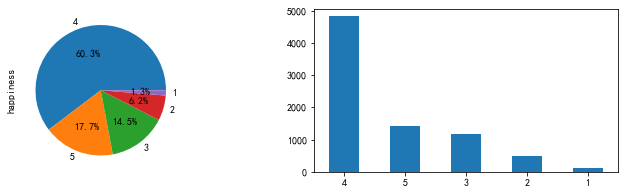

In [13]:
f, ax = plt.subplots(1,2,figsize=(12,3))
data.happiness.value_counts().plot(kind='pie',ax=ax[0],autopct='%1.1f%%')
data.happiness.value_counts().plot(kind='bar',ax=ax[1],rot=0)
plt.show()

由饼图展示happiness中的数据结构可知:

    幸福感为4,5的大约有80%。幸福感为1,2,3的大约有20%。可认为本次调查中有80%的人觉得生活很幸福，20%的人觉得生活不是很幸福。
    可将happiness=4,5的归为幸福一类，happiness=1,2,3的归为不幸福一类。
    由此创建一个新的二分类特征happiness_，0:不幸福，1:幸福，用与对其它特征判定是否幸福的简化分析。

In [14]:
data['happiness_'] = data.happiness.apply(lambda x: 0 if x<4 else 1)
data['happiness_'].value_counts()

1    6228
0    1760
Name: happiness_, dtype: int64

## id编号
这里对特征分析处理的方式是从上往下的顺序处理

In [15]:
data.drop(columns=['id'],inplace=True)
test.drop(columns=['id'],inplace=True)

## survey_type样本类型
1 = 城市; 2 = 农村;

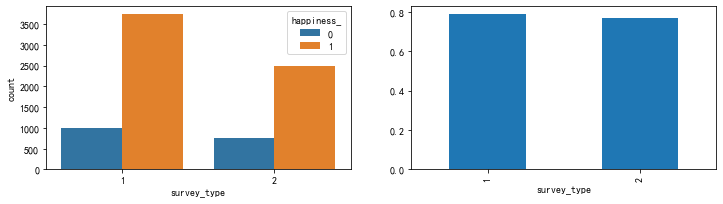

In [16]:
f, ax = plt.subplots(1,2,figsize=(12,3))
sns.countplot('survey_type',hue='happiness_',data=data,ax=ax[0])
data.groupby('survey_type').happiness_.mean().plot(kind='bar',ax=ax[1])

可看出城市人口数量较多，且城市人口与农村人口关于幸福感分布相近。但居住在城市还是农村对幸福感影响不大

## city、county、province
province：采访地点-省/自治区/直辖市编码

    1 = 上海市; 2 = 云南省; 3 = 内蒙古自治区; 4 = 北京市; 5 = 吉林省; 6 = 四川省; 7 = 天津市; 8 = 宁夏回族自治区; 9 = 安徽省; 10 = 山东省; 11 = 山西省; 12 = 广东省; 13 = 广西壮族自治区; 14 = 新疆维吾尔自治区; 15 = 江苏省; 16 = 江西省; 17 = 河北省; 18 = 河南省; 19 = 浙江省; 20 = 海南省; 21 = 湖北省; 22 = 湖南省; 23 = 甘肃省; 24 = 福建省; 25 = 西藏自治区; 26 = 贵州省; 27 = 辽宁省; 28 = 重庆市; 29 = 陕西省; 30 = 青海省; 31 = 黑龙江省
city和county都是表示地域的特征，与province概念重复，可将其删除。

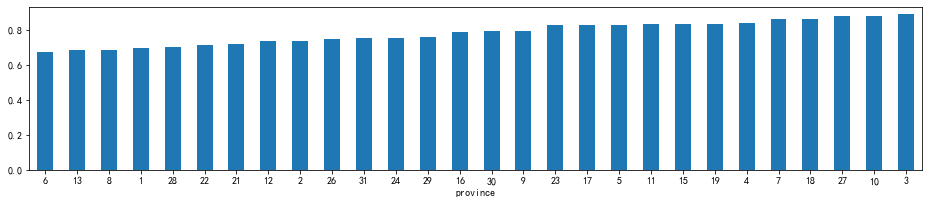

In [17]:
fig = plt.figure(figsize=(16,3))
# sns.countplot('province',hue='happiness_',data=data)
data.groupby('province').happiness_.mean().sort_values().plot(kind='bar',rot=0)

In [18]:
data.groupby('province').happiness_.mean().sort_values()

province
6     0.673913
13    0.681159
8     0.685714
1     0.693878
28    0.697674
22    0.713068
21    0.716590
12    0.732648
2     0.735714
26    0.748691
31    0.749409
24    0.753695
29    0.755396
16    0.786932
30    0.791045
9     0.793893
23    0.823529
17    0.825893
5     0.828080
11    0.830769
15    0.833333
19    0.833811
4     0.836364
7     0.859155
18    0.860140
27    0.875000
10    0.875306
3     0.885714
Name: happiness_, dtype: float64

由于有的地区间幸福感差异较大，有的地区间幸福感差异较小。且地区分类数较多，因此对地区根据幸福感比重进行划分，分为：

    1 67%+4%
    2 73%+4%
    3 78%+4%
    4 83%+4%

In [19]:
data.province.replace([6,13,8,1,28,22,21],1,inplace = True)
data.province.replace([12,2,26,31,24,29],2,inplace = True)
data.province.replace([11,15,19,4,7,18,27,10,3],3,inplace = True) # 注意这里，不要将数据和其他数据先合并了，这也是为啥交换顺序
data.province.replace([16,30,9,23,17,5],4,inplace = True)

test.province.replace([6,13,8,1,28,22,21],1,inplace = True)
test.province.replace([12,2,26,31,24,29],2,inplace = True)
test.province.replace([11,15,19,4,7,18,27,10,3],3,inplace = True)
test.province.replace([16,30,9,23,17,5],4,inplace = True)

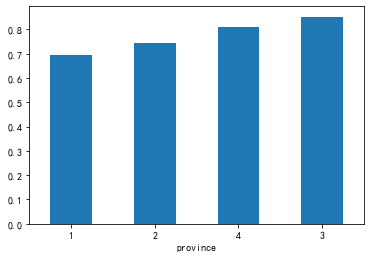

In [20]:
data.groupby('province').happiness_.mean().sort_values().plot(kind='bar',rot=0)

In [21]:
data.drop(columns=['city','county'], inplace=True)
test.drop(columns=['city','county'], inplace=True)

## gender性别
1 = 男; 2 = 女

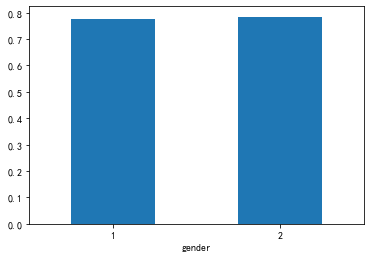

In [22]:
data.groupby('gender')['happiness_'].mean().sort_values().plot(kind='bar',rot=0)

由图表可知本次调查男女比例接近，且幸福感分布相近

## birth 您的出生日期 年
 可以得到年龄的特征,调查日期是2015

In [23]:
data['age'] = 2015-data.birth
test['age'] = 2015-test.birth

对年龄分组，每隔20岁为一组，展示各年龄段人数分布情况，并将其幸福感结构用饼图展示。

In [24]:
def groups(row):
    if row<20:
        return 1
    elif row<40:
        return 2
    elif row<60:
        return 3
    elif row<80:
        return 4
    else:
        return 5
    
data['age_'] = data.age.apply(groups)
test['age_'] = test.age.apply(groups)

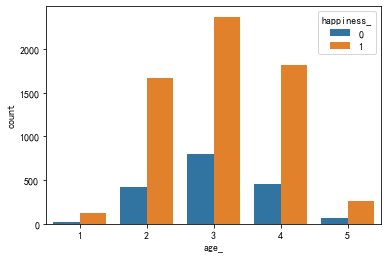

In [25]:
sns.countplot('age_', hue='happiness_',data=data)

In [26]:
data.drop(columns=['birth'],inplace=True)
test.drop(columns=['birth'],inplace=True)

## nationality民族
1 = 汉; 2 = 蒙; 3 = 满; 4 = 回; 5 = 藏; 6 = 壮; 7 = 维; 8 = 其他;

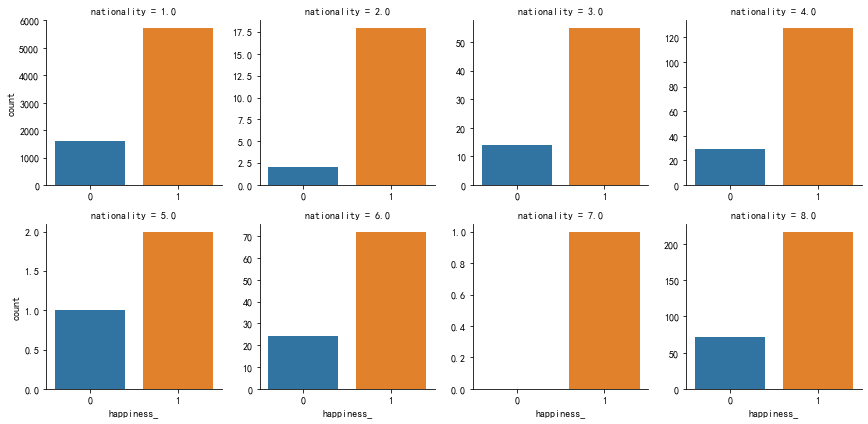

In [27]:
sns.catplot("happiness_", col="nationality", col_wrap=4,data=data,kind="count", height=3,sharex=False,sharey=False)

民族类别2,5,7的样本量较少，不具备该民族幸福感分布的普遍性，将其归为1;根据幸福程度，将6,8合并为1类

In [28]:
data.nationality.replace([2,5,7],1,inplace = True)
data.nationality.replace([3],2,inplace = True)
data.nationality.replace([4],3,inplace = True)
data.nationality.replace([6,8],4,inplace = True)

test.nationality.replace([2,5,7],1,inplace = True)
test.nationality.replace([3],2,inplace = True)
test.nationality.replace([4],3,inplace = True)
test.nationality.replace([6,8],4,inplace = True)

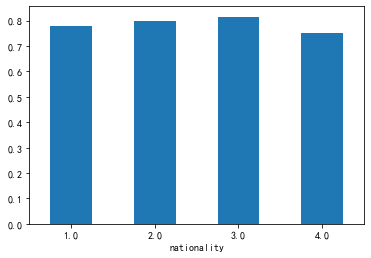

In [29]:
data.groupby('nationality')['happiness_'].mean().plot(kind='bar',rot=0)

不同民族的幸福感分布不同，但幸福感比重相差不大。

## religion、religion_freq
是否信仰宗教religion:0 = 否; 1 = 是;

参加宗教活动的频繁程度religion_freq: 1 = 从来没有参加过; 2 = 一年不到1次; 3 = 一年大概1到2次; 4 = 一年几次; 5 = 大概一月1次; 6 = 一月2到3次; 7 = 差不多每周都有; 8 = 每周都有; 9 = 一周几次;

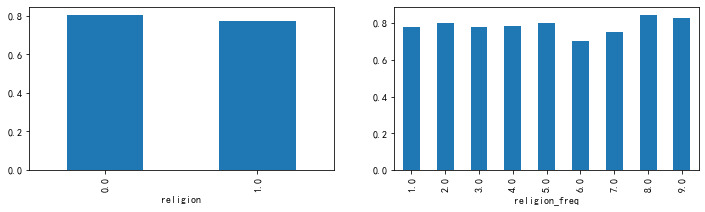

In [30]:
f, ax = plt.subplots(1,2,figsize=(12,3))
data.groupby('religion').happiness_.mean().plot(kind='bar',ax=ax[0])
data.groupby('religion_freq').happiness_.mean().plot(kind='bar',ax=ax[1])
plt.show()

从柱形图中可看出，信仰宗教程度对幸福感影响较小

## edu、edu_status、edu_yr
edu 目前的最高教育程度（包括目前在读的）

    1 = 没有受过任何教育; 2 = 私塾、扫盲班; 3 = 小学; 4 = 初中; 5 = 职业高中; 6 = 普通高中; 7 = 中专; 8 = 技校; 9 = 大学专科（成人高等教育）; 10 = 大学专科（正规高等教育）; 11 = 大学本科（成人高等教育）; 12 = 大学本科（正规高等教育）; 13 = 研究生及以上; 14 = 其他;

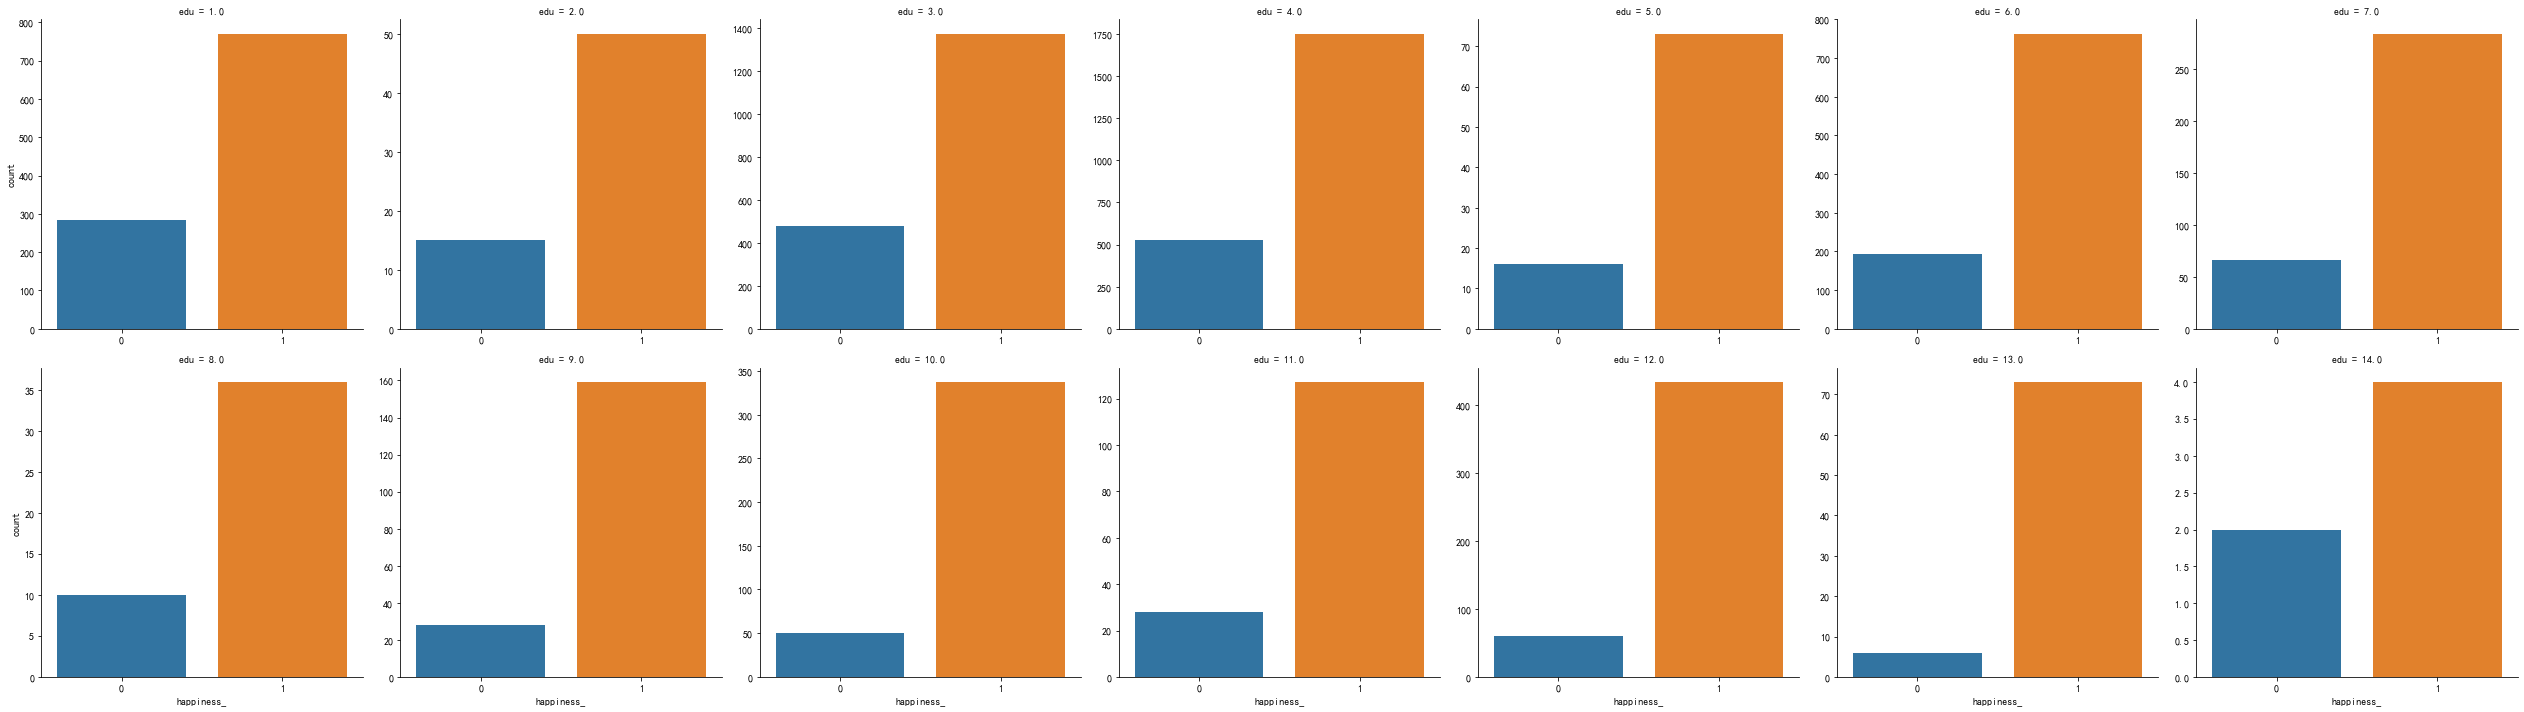

In [31]:
sns.catplot(kind='count',x='happiness_',col='edu',col_wrap=7,data=data,sharex=False,sharey=False)

In [32]:
# 类别14的数量过少，不具备代表性，将其归为4
data.edu.replace([14],4,inplace = True)
test.edu.replace([14],4,inplace = True)

等级划分

    将没有读过书的划为一类
    将高中以下的划为一类
    将大学以下的划为一类
    将大学以上的划为一类

In [33]:
data.edu.replace([2,3,4],2,inplace = True)
data.edu.replace([5,6,7,8],3,inplace = True)
data.edu.replace([9,10,11,12,13],4,inplace = True)

test.edu.replace([2,3,4],2,inplace = True)
test.edu.replace([5,6,7,8],3,inplace = True)
test.edu.replace([9,10,11,12,13],4,inplace = True)

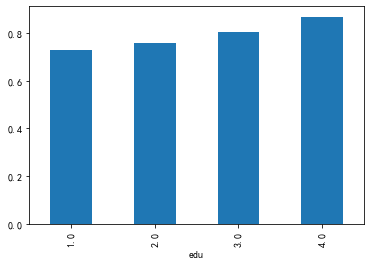

In [34]:
data.groupby('edu').happiness_.mean().plot(kind='bar')

观察图像发现，学历越高，意味着幸福感越高。

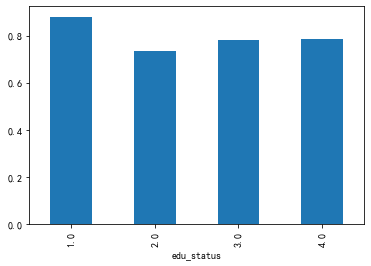

In [35]:
data.groupby('edu_status').happiness_.mean().plot(kind='bar')

edu_status: 1 = 正在读; 2 = 辍学和中途退学; 3 = 肄业; 4 = 毕业; 

观察图像发现，正在读幸福度较高，中途缀学不幸福度较低，步入社会幸福度减少

In [36]:
data.drop(columns=['edu_yr'],inplace=True) # 感觉哪一年毕业不重要
test.drop(columns=['edu_yr'],inplace=True)

## income、family_income、s_income
income个人去年全年的总收入

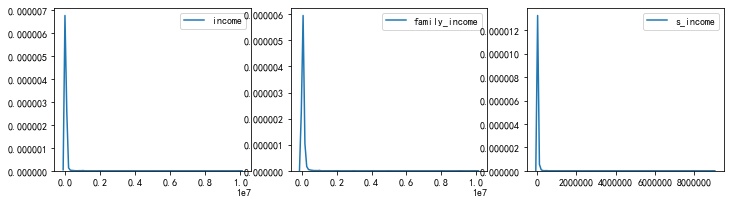

In [37]:
f, ax = plt.subplots(1,3,figsize=(12,3))
sns.kdeplot(data.income,ax=ax[0])
sns.kdeplot(data.family_income,ax=ax[1])
sns.kdeplot(data.s_income,ax=ax[2])
plt.show()

分布呈现严重的右偏分布,考虑将其对数化。先分组试试

In [38]:
# 划分成等级
def grade(col):
    if col<=0: # 收入为空的或者为零为负的，当做没有收入处理
        return 1
    elif  0<col<=3000:
        return 2
    elif  3000<col<=10000:
        return 3
    elif  10000<col<30000:
        return 4
    elif  30000<=col<80000:
        return 5
    elif  80000<=col<150000:
        return 6
    elif  col>=150000: # 本打算大于1百万的为一个等级，结果30万以上的都很少
        return 7

In [39]:
data.income = data.income.apply(grade)
data.family_income = data.family_income.apply(grade)
data.s_income = data.s_income.apply(grade)

test.income = test.income.apply(grade)
test.family_income = test.family_income.apply(grade)
test.s_income = test.s_income.apply(grade)

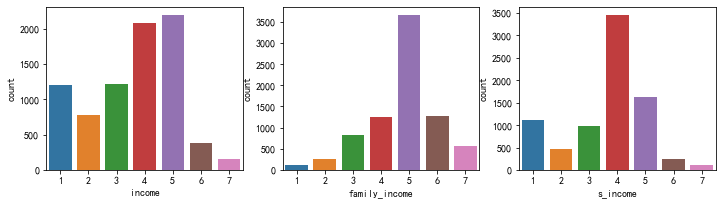

In [40]:
f, ax = plt.subplots(1,3,figsize=(12,3))
sns.countplot(data.income,ax=ax[0])
sns.countplot(data.family_income,ax=ax[1])
sns.countplot(data.s_income,ax=ax[2])
plt.show()

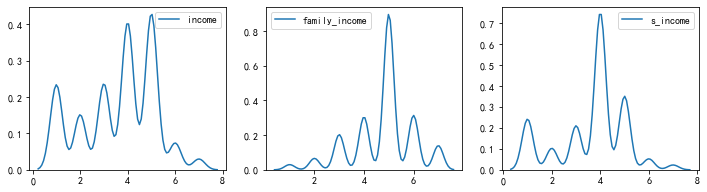

In [41]:
f, ax = plt.subplots(1,3,figsize=(12,3))
sns.kdeplot(data.income,ax=ax[0])
sns.kdeplot(data.family_income,ax=ax[1])
sns.kdeplot(data.s_income,ax=ax[2])
plt.show()

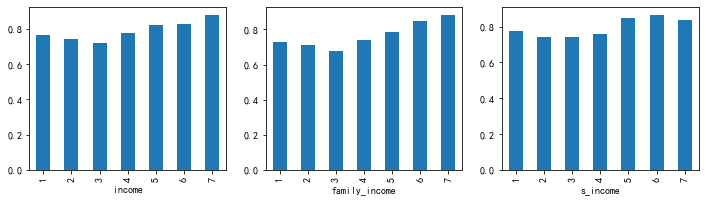

In [42]:
f, ax = plt.subplots(1,3,figsize=(12,3))
data.groupby('income').happiness_.mean().plot(kind='bar',ax=ax[0])
data.groupby('family_income').happiness_.mean().plot(kind='bar',ax=ax[1])
data.groupby('s_income').happiness_.mean().plot(kind='bar',ax=ax[2])

从图中可以看出，穷苦人家不怎么幸福，收入越高越幸福,但超过一定范围后，趋势变得平稳

## political、s_political、f_political、m_political
政治面貌: 1 = 群众; 2 = 共青团员; 3 = 民主党派; 4 = 共产党员;

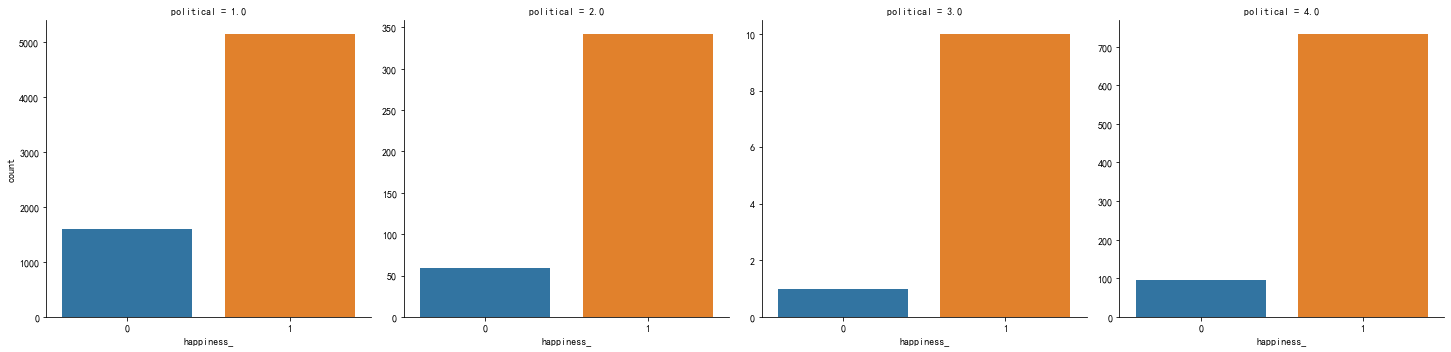

In [43]:
sns.catplot(kind='count',x='happiness_',col='political',col_wrap=7,data=data,sharex=False,sharey=False)

In [44]:
# 其中3人数较少，所以3的幸福感不具备普遍性，将其并归为4
data.political.replace([3],4,inplace = True)
test.political.replace([3],4,inplace = True)

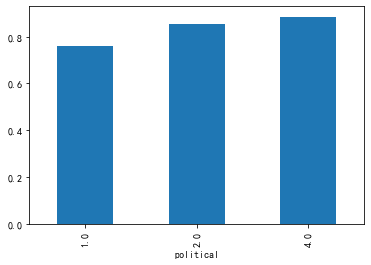

In [45]:
data.groupby('political')['happiness_'].mean().sort_values().plot(kind='bar')

In [46]:
data.drop(columns=['s_political','f_political','m_political'],inplace=True) # 这里不考虑父母、妻子的政治面貌
test.drop(columns=['s_political','f_political','m_political'],inplace=True)

## floor_area 住房的套内建筑面积

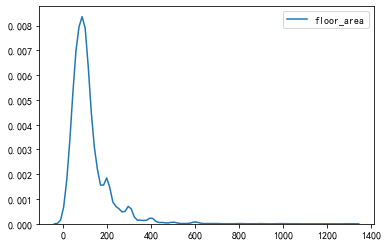

In [47]:
sns.kdeplot(data.floor_area)

In [48]:
# 住房面积呈现右偏分布。进行分段
def groups(row):
    if row<10:
        return 1
    elif row<20:
        return 2
    elif row<50:
        return 3
    elif row<100:
        return 4
    elif row<200:
        return 5
    elif row<300:
        return 6
    else:
        return 7
    
data.floor_area = data.floor_area.apply(groups)
test.floor_area = test.floor_area.apply(groups)

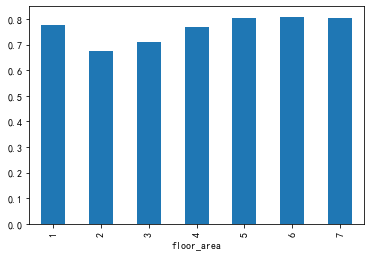

In [49]:
data.groupby('floor_area').happiness_.mean().plot(kind='bar')

由图得出，住房面积越大越幸福

## property房子的产权

In [50]:
# 暂不处理

## height_cm、weight_jin身高、体重

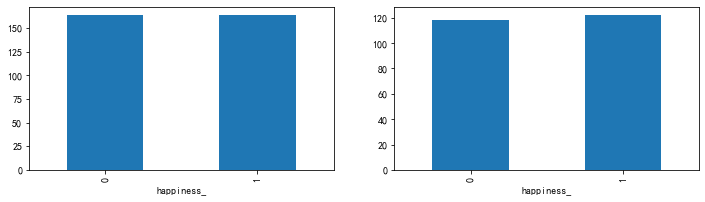

In [51]:
f, ax = plt.subplots(1,2,figsize=(12,3))
data.groupby('happiness_').height_cm.mean().plot(kind='bar',ax=ax[0])
data.groupby('happiness_').weight_jin.mean().plot(kind='bar',ax=ax[1])

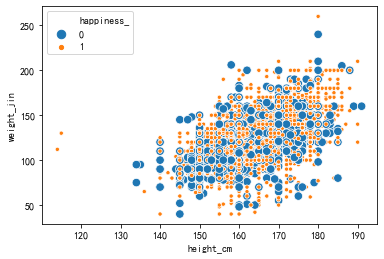

In [52]:
# 用散点图看看
sns.scatterplot('height_cm','weight_jin',hue='happiness_',size='happiness_',data=data)

从直方图中可以看出，身高、体重不影响幸福感，散点图中身高与体重成正比。身高、体重对幸福感影响甚微

## health、health_problem
身体健康状况：1 = 很不健康; 2 = 比较不健康; 3 = 一般; 4 = 比较健康; 5 = 很健康;

健康问题影响工作的频繁程度：1 = 总是; 2 = 经常; 3 = 有时; 4 = 很少; 5 = 从不;

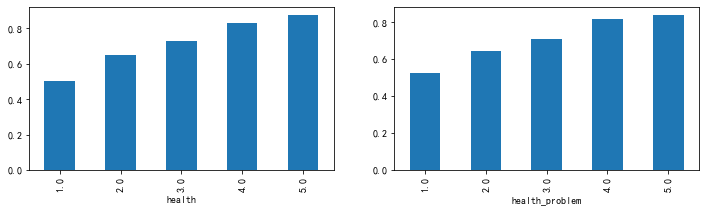

In [53]:
f, ax = plt.subplots(1,2,figsize=(12,3))
data.groupby('health').happiness_.mean().plot(kind='bar',ax=ax[0])
data.groupby('health_problem').happiness_.mean().plot(kind='bar',ax=ax[1])

由柱形图可知，健康指数越高，幸福感越高，且相差较大，因此健康是衡量人幸福感大小的重要指标。

由柱形图可知，疾病指数越低，幸福感越高，且相差较大，再次验证健康是衡量人幸福感大小的重要指标。

## depression
过去四周感到沮丧的频繁程度 1 = 总是; 2 = 经常; 3 = 有时; 4 = 很少; 5 = 从不;

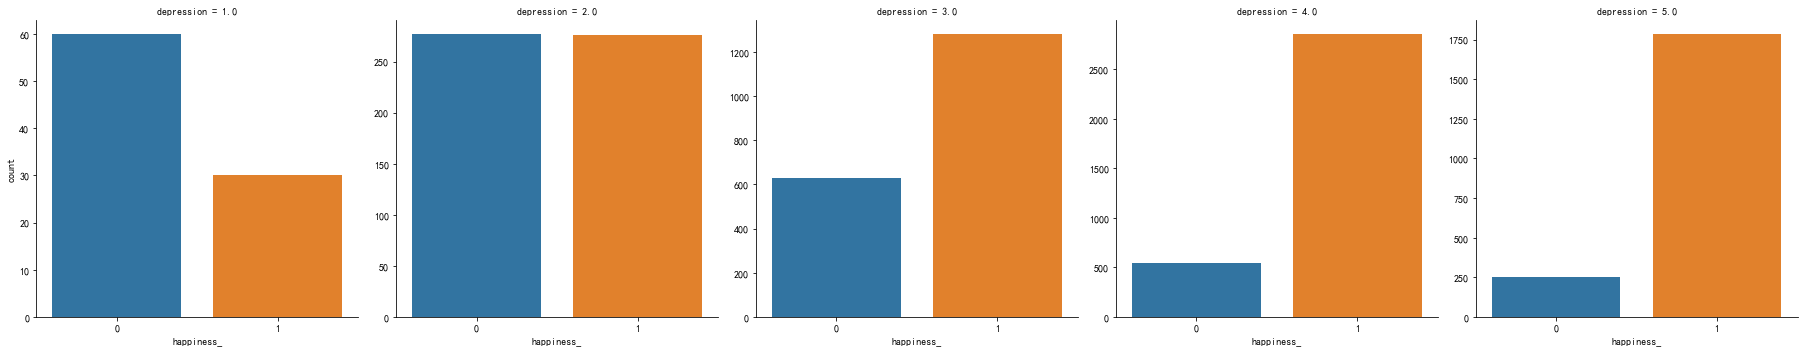

In [54]:
sns.catplot(kind='count',x='happiness_',col='depression',col_wrap=5,data=data,sharex=False,sharey=False)

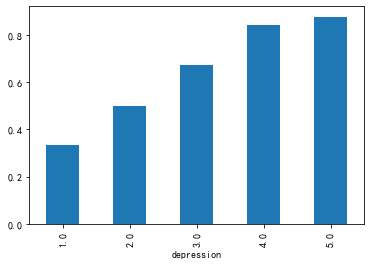

In [55]:
data.groupby('depression').happiness_.mean().plot(kind='bar')

由柱形图可知，沮丧的频率越低，幸福感越高。心情是影响幸福感的一个重要特征。

## hukou、hukou_loc
hukou_loc您目前的户口登记地

hukou户口登记状况：

    1 = 农业户口; 2 = 非农业户口; 3 = 蓝印户口; 4 = 居民户口（以前是农业户口）; 5 = 居民户口（以前是非农业户口）; 6 = 军籍; 7 = 没有户口; 8 = 其他;

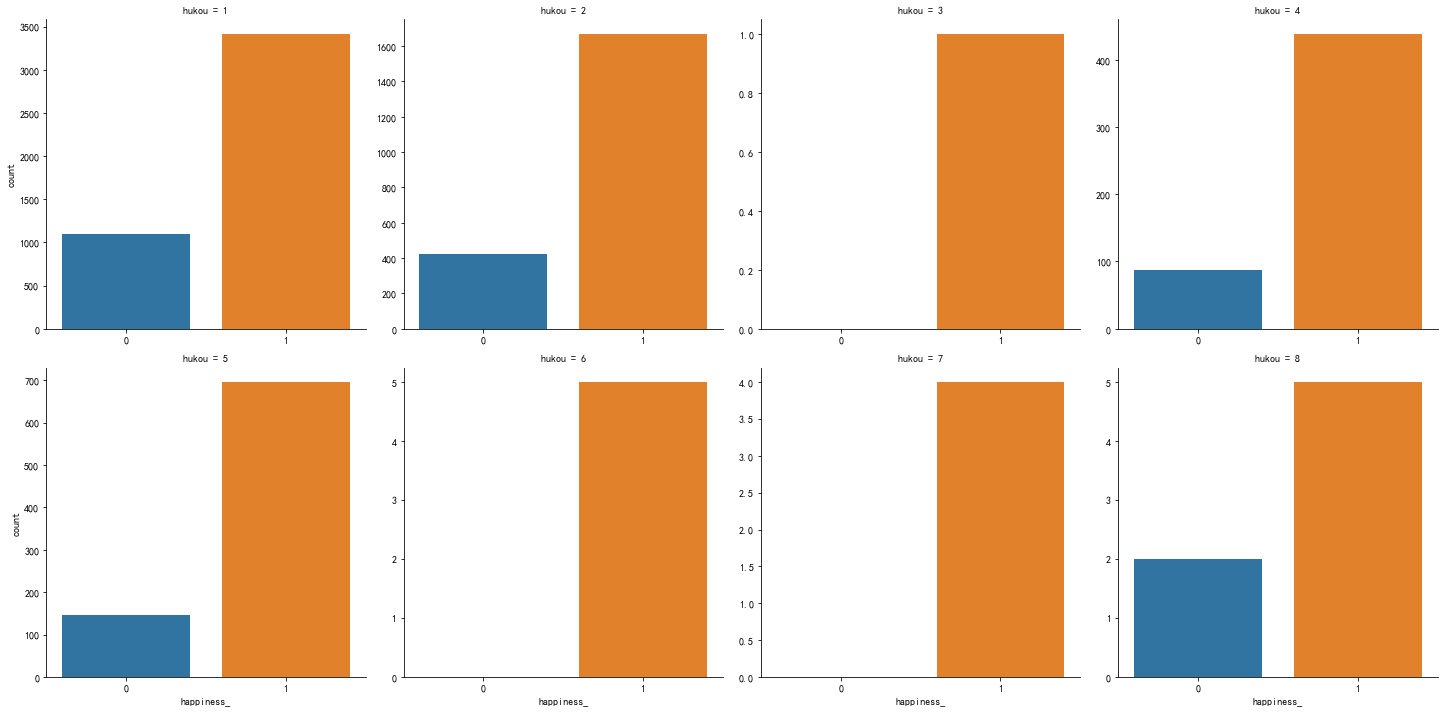

In [56]:
sns.catplot(kind='count',x='happiness_',col='hukou',col_wrap=4,data=data,sharex=False,sharey=False)

In [57]:
# hokou特征中3,6,7,8的数据量过少，不具备代表性替换为1
data.hukou.replace([3,6,7,8],1,inplace = True)
test.hukou.replace([3,6,7,8],1,inplace = True)

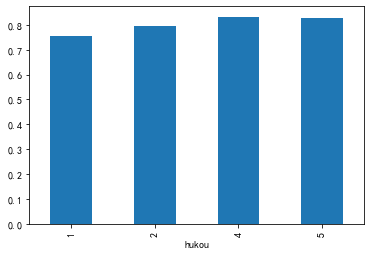

In [58]:
data.groupby('hukou').happiness_.mean().plot(kind='bar')

由柱形图可知，不同户口类型的幸福感相差不大。

In [59]:
data.drop(columns=['hukou_loc'], inplace=True) # 暂时不处理这个特征
test.drop(columns=['hukou_loc'], inplace=True)

## media_x 消息获取途径

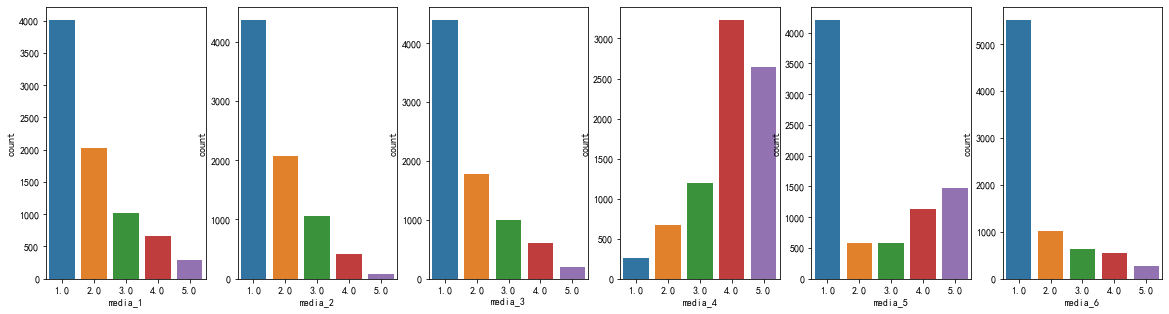

In [60]:
# 查看一下获取消息的途径，结果发现1，2，3分布一样，留一个
f, ax = plt.subplots(1, 6, figsize=(20, 5))
sns.countplot(x='media_1',data=data,ax=ax[0])
sns.countplot(x='media_2',data=data,ax=ax[1])
sns.countplot(x='media_3',data=data,ax=ax[2])
sns.countplot(x='media_4',data=data,ax=ax[3])
sns.countplot(x='media_5',data=data,ax=ax[4])
sns.countplot(x='media_6',data=data,ax=ax[5])

In [61]:
data.drop(columns=['media_2','media_3'],inplace=True) # 前三个数据分布基本一样，删除两个
test.drop(columns=['media_2','media_3'],inplace=True)

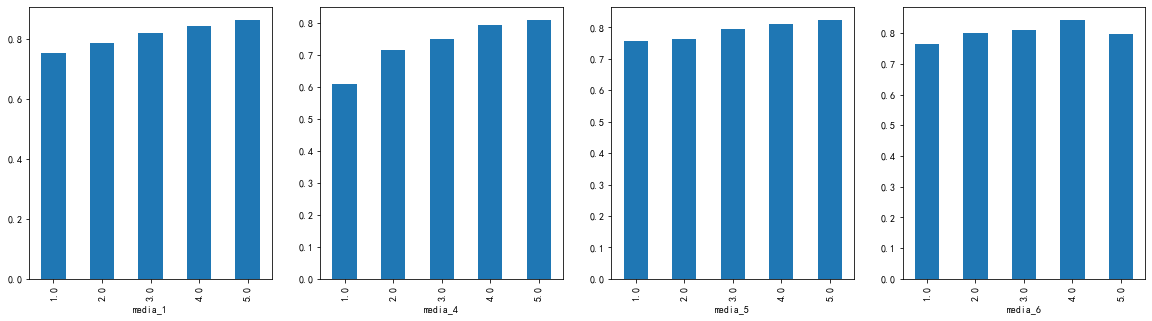

In [62]:
f, ax = plt.subplots(1, 4, figsize=(20, 5))
data.groupby('media_1').happiness_.mean().plot(kind='bar',ax=ax[0])
data.groupby('media_4').happiness_.mean().plot(kind='bar',ax=ax[1])
data.groupby('media_5').happiness_.mean().plot(kind='bar',ax=ax[2])
data.groupby('media_6').happiness_.mean().plot(kind='bar',ax=ax[3])

从不看电视的人不幸福？

## leisure在空闲时间从事以下活动

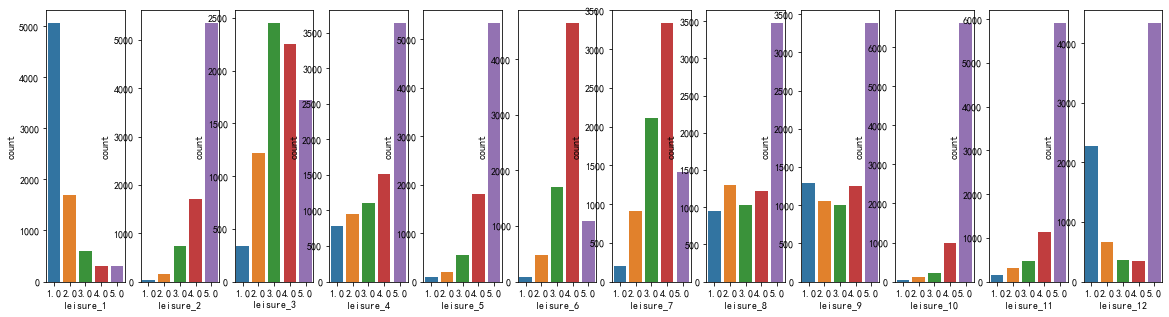

In [63]:
f, ax = plt.subplots(1, 12, figsize=(20, 5))
sns.countplot(x='leisure_1',data=data,ax=ax[0])
sns.countplot(x='leisure_2',data=data,ax=ax[1])
sns.countplot(x='leisure_3',data=data,ax=ax[2])
sns.countplot(x='leisure_4',data=data,ax=ax[3])
sns.countplot(x='leisure_5',data=data,ax=ax[4])
sns.countplot(x='leisure_6',data=data,ax=ax[5])
sns.countplot(x='leisure_7',data=data,ax=ax[6])
sns.countplot(x='leisure_8',data=data,ax=ax[7])
sns.countplot(x='leisure_9',data=data,ax=ax[8])
sns.countplot(x='leisure_10',data=data,ax=ax[9])
sns.countplot(x='leisure_11',data=data,ax=ax[10])
sns.countplot(x='leisure_12',data=data,ax=ax[11])

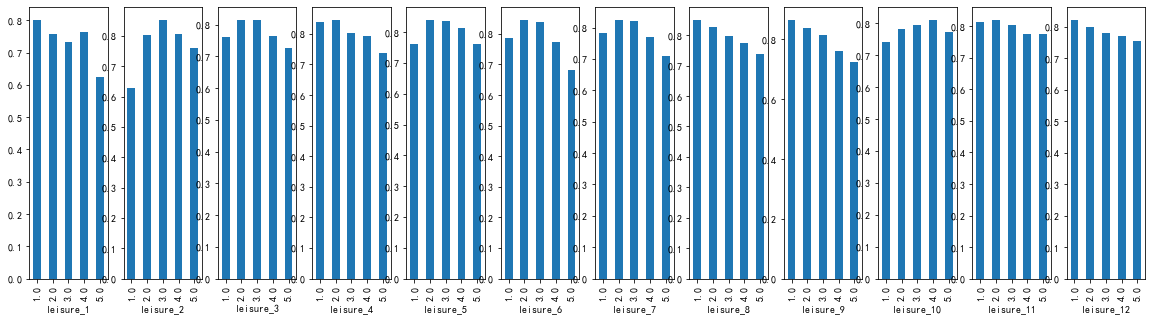

In [64]:
f, ax = plt.subplots(1, 12, figsize=(20, 5))
data.groupby('leisure_1').happiness_.mean().plot(kind='bar',ax=ax[0])
data.groupby('leisure_2').happiness_.mean().plot(kind='bar',ax=ax[1])
data.groupby('leisure_3').happiness_.mean().plot(kind='bar',ax=ax[2])
data.groupby('leisure_4').happiness_.mean().plot(kind='bar',ax=ax[3])
data.groupby('leisure_5').happiness_.mean().plot(kind='bar',ax=ax[4])
data.groupby('leisure_6').happiness_.mean().plot(kind='bar',ax=ax[5])
data.groupby('leisure_7').happiness_.mean().plot(kind='bar',ax=ax[6])
data.groupby('leisure_8').happiness_.mean().plot(kind='bar',ax=ax[7])
data.groupby('leisure_9').happiness_.mean().plot(kind='bar',ax=ax[8])
data.groupby('leisure_10').happiness_.mean().plot(kind='bar',ax=ax[9])
data.groupby('leisure_11').happiness_.mean().plot(kind='bar',ax=ax[10])
data.groupby('leisure_12').happiness_.mean().plot(kind='bar',ax=ax[11])

## socialize
社交频率:1 = 从不; 2 = 很少; 3 = 有时; 4 = 经常; 5 = 非常频繁;

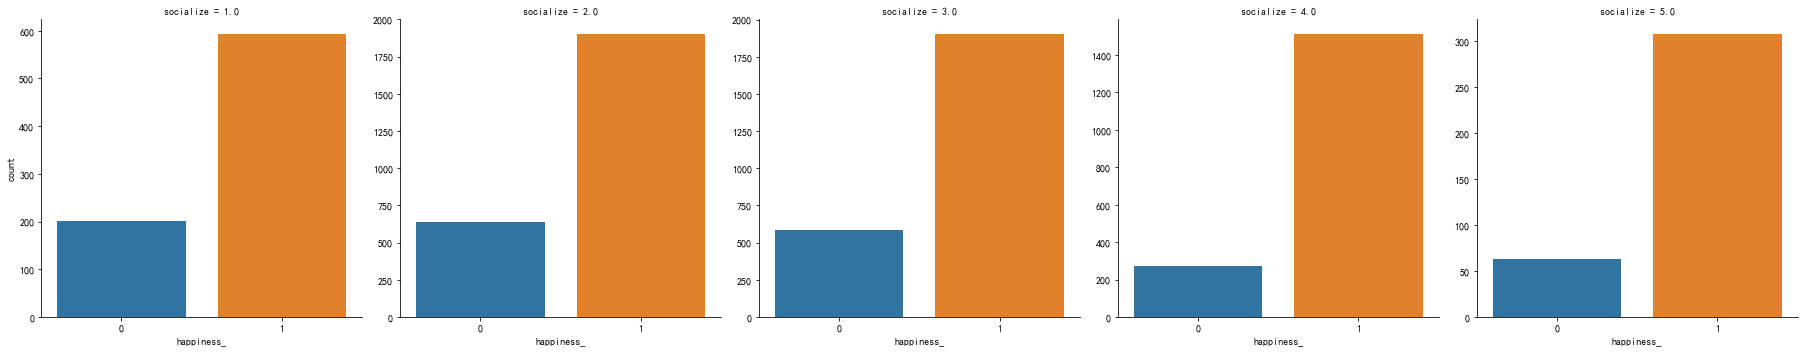

In [65]:
sns.catplot(kind='count',x='happiness_',col='socialize',col_wrap=5,data=data,sharex=False,sharey=False)

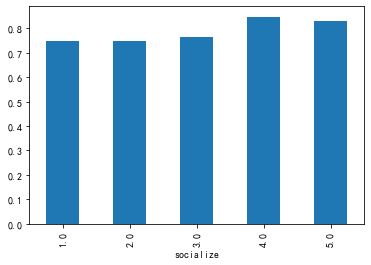

In [66]:
data.groupby('socialize').happiness_.mean().plot(kind='bar')

## social_neighbor、social_friend、socia_outing
与邻居社交活动、与朋友社交、不在家过夜

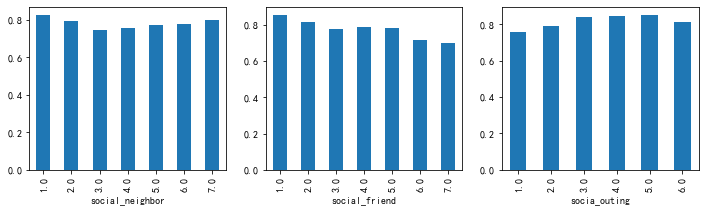

In [67]:
f, ax = plt.subplots(1,3,figsize=(12,3))
data.groupby('social_neighbor').happiness_.mean().plot(kind='bar',ax=ax[0])
data.groupby('social_friend').happiness_.mean().plot(kind='bar',ax=ax[1])
data.groupby('socia_outing').happiness_.mean().plot(kind='bar',ax=ax[2])

很少和朋友一起玩的幸福程度会降低

## relax
过去一年中休息放松的频繁程度1 = 从不; 2 = 很少; 3 = 有时; 4 = 经常; 5 = 非常频繁;

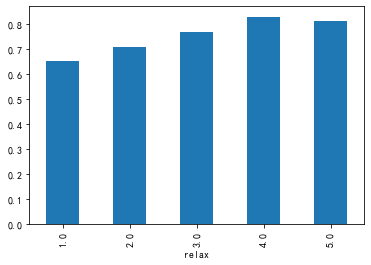

In [68]:
data.groupby('relax').happiness_.mean().plot(kind='bar')

由柱形图可知，放松休息的频率越高，幸福感越高。但休息的太过频繁，如4,5，对幸福感的提升不大，甚至可能起反向作用。可见，适当的休息有助于幸福感的提升。

## learn
过去一年学习充电的程度:1 = 从不; 2 = 很少; 3 = 有时; 4 = 经常; 5 = 非常频繁;

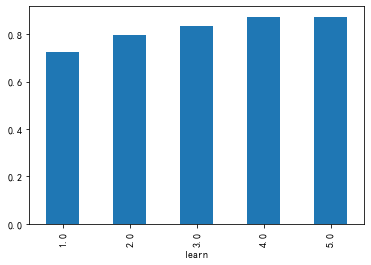

In [69]:
data.groupby('learn').happiness_.mean().plot(kind='bar')

## equity
认为当今社会是否公平:1 = 完全不公平; 2 = 比较不公平; 3 = 说不上公平但也不能说不公平; 4 = 比较公平; 5 = 完全公平;

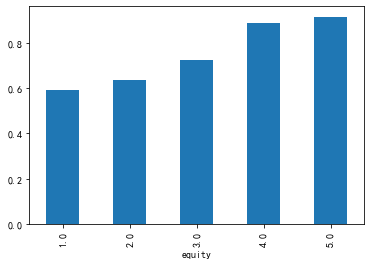

In [70]:
data.groupby('equity').happiness_.mean().plot(kind='bar')

认为当今社会平等程度越高的，幸福感越高。

## class、class_10_before、class_10_after、class_14
所处阶级:1 = 1(最底层); 10 = 10(最顶层)

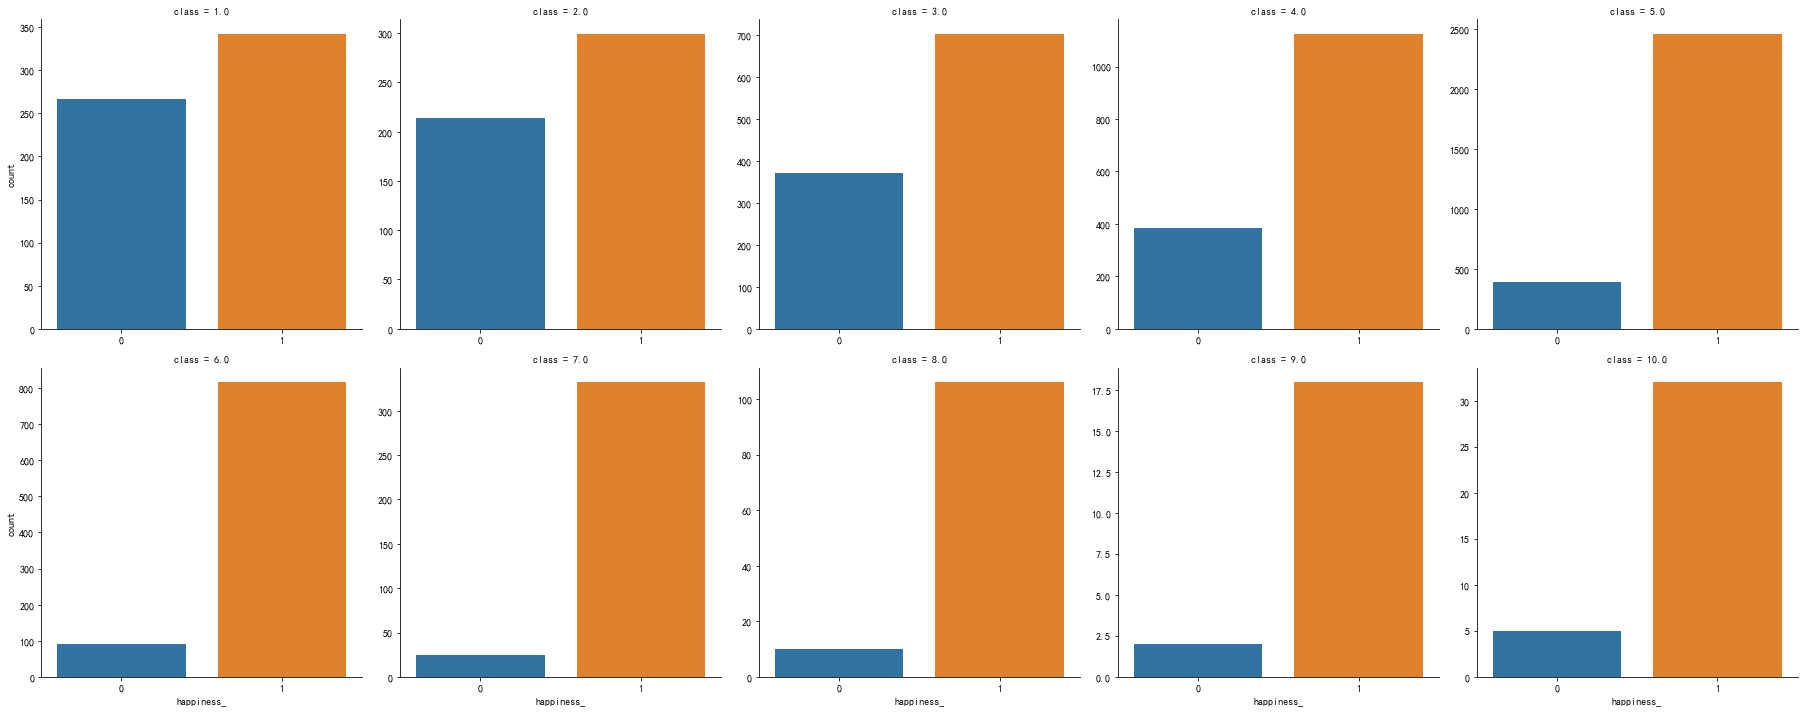

In [71]:
sns.catplot(kind='count',x='happiness_',col='class',col_wrap=5,data=data,sharex=False,sharey=False)

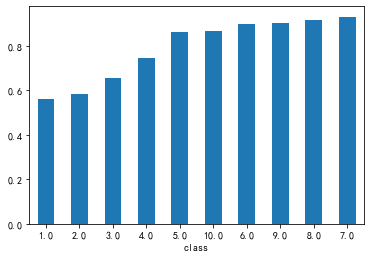

In [72]:
# 发现上面那种显示观察的不怎么明显，换种方法，已知不幸福为0，幸福为1，算出其每个等级的平均幸福度，越大于0.5的阶层越幸福
data.groupby('class').happiness_.mean().sort_values().plot(kind='bar',rot=0)

In [73]:
# 根据不同阶级幸福感比重不同，且有较大的差异。
# 将幸福感比重相近的归为同一等级。可看出，阶级等级越高，幸福感的值越高。
data['class'].replace([5,10],5,inplace = True)
data['class'].replace([6,9,8,7],6,inplace = True)

test['class'].replace([5,10],5,inplace = True)
test['class'].replace([6,9,8,7],6,inplace = True)

In [74]:
data.drop(columns=['class_10_before','class_10_after','class_14'], inplace=True) # 暂不处理,后面可以考虑新增特征
test.drop(columns=['class_10_before','class_10_after','class_14'], inplace=True)

## work_exper
工作经历1 = 目前从事非农工作; 2 = 目前务农，曾经有过非农工作; 3 = 目前务农，没有过非农工作; 4 = 目前没有工作，而且只务过农; 5 = 目前没有工作，曾经有过非农工作; 6 = 从未工作过;

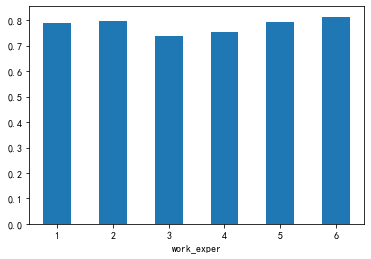

In [75]:
data.groupby('work_exper').happiness_.mean().plot(kind='bar',rot=0)

## insur_x社保商保

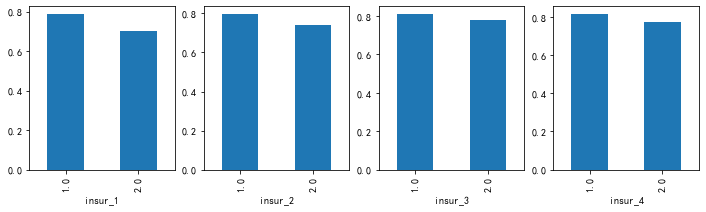

In [76]:
f, ax = plt.subplots(1,4,figsize=(12,3))
data.groupby('insur_1').happiness_.mean().plot(kind='bar',ax=ax[0])
data.groupby('insur_2').happiness_.mean().plot(kind='bar',ax=ax[1])
data.groupby('insur_3').happiness_.mean().plot(kind='bar',ax=ax[2])
data.groupby('insur_4').happiness_.mean().plot(kind='bar',ax=ax[3])

In [77]:
data.drop(columns=['insur_2','insur_4'],inplace=True) # 一样留一个
test.drop(columns=['insur_2','insur_4'],inplace=True)

## family_m
家里目前住在一起的通常有几人（包括您本人）

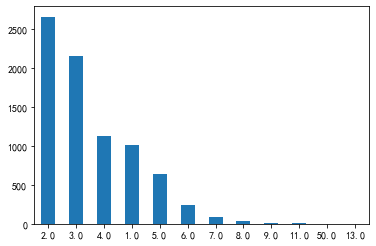

In [78]:
data.family_m.value_counts().plot(kind='bar',rot=0)

家庭人数大于8的人数过少，不具备代表性，因此将其都统一为8口人。

In [79]:
data.family_m.replace([9,11,50,13],8,inplace = True)
test.family_m.replace([9,11,50,13],8,inplace = True)

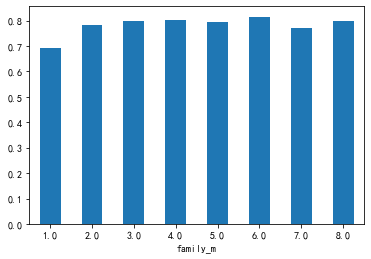

In [80]:
data.groupby('family_m').happiness_.mean().plot(kind='bar',rot=0)

就家庭成员来说，独自一人的幸福感较少。其它情况相差不大。

## son、daughter、minor_child
您有几个儿子、您有几个女儿、您有几个18周岁以下未成年子女

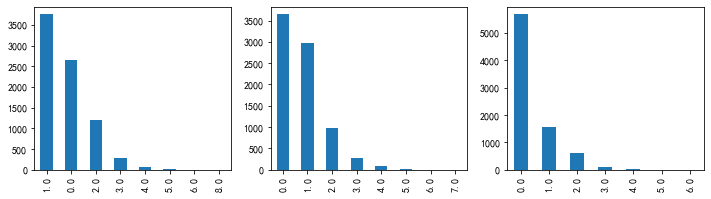

In [81]:
f, ax = plt.subplots(1,3,figsize=(12,3))
data.son.value_counts().plot(kind='bar',ax=ax[0])
data.daughter.value_counts().plot(kind='bar',ax=ax[1])
data.minor_child.value_counts().plot(kind='bar',ax=ax[2])

In [82]:
# 大于4个的人数过少，不具备代表性
data['son'].replace([5,6,8],4,inplace = True)
data['daughter'].replace([5,6,7],4,inplace = True)
data['minor_child'].replace([4,5,6],3,inplace = True)

test['son'].replace([5,6,8],4,inplace = True)
test['daughter'].replace([5,6,7],4,inplace = True)
test['minor_child'].replace([4,5,6],3,inplace = True)

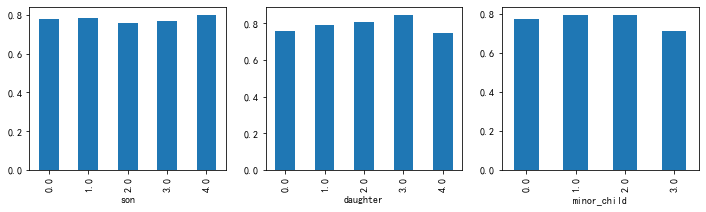

In [83]:
f, ax = plt.subplots(1,3,figsize=(12,3))
data.groupby('son').happiness_.mean().plot(kind='bar',ax=ax[0])
data.groupby('daughter').happiness_.mean().plot(kind='bar',ax=ax[1])
data.groupby('minor_child').happiness_.mean().plot(kind='bar',ax=ax[2])

## family_status
家庭经济状况在所在地属于哪一档:1 = 远低于平均水平; 2 = 低于平均水平; 3 = 平均水平; 4 = 高于平均水平; 5 = 远高于平均水平;

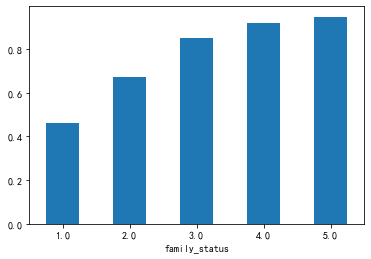

In [84]:
data.groupby('family_status').happiness_.mean().plot(kind='bar',rot=0)

由柱形图可知，不同家庭状况之间幸福感相差较大，家庭状况越好，幸福感越高。说明家庭状况是对幸福感影响比较大的特征。

## house

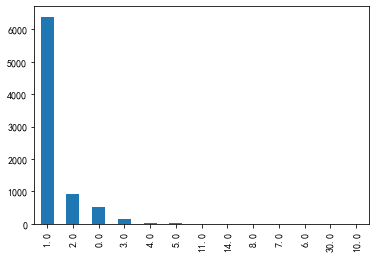

In [85]:
data.house.value_counts().plot(kind='bar')

房产数量大于4的数量较少，不具备代表性，因此统一为4

In [86]:
data.house.replace([5,11,14,8,7,6,30,10],4,inplace = True)
test.house.replace([5,11,14,8,7,6,30,10],4,inplace = True)

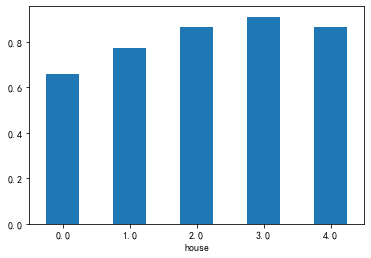

In [87]:
data.groupby('house').happiness_.mean().plot(kind='bar',rot=0)

由柱形图可知，无房产的人幸福感最低。有两套及以上房产的人幸福感较高。但随着房产越来越多，对幸福感的提升效果甚微。

## car
是否拥有家用小汽车:1 = 有; 2 = 没有;

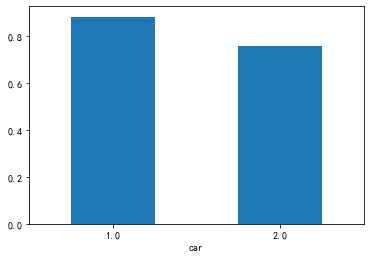

In [88]:
data.groupby('car').happiness_.mean().plot(kind='bar',rot=0)

简单来看，有小汽车的比没有小汽车的幸福感要高些

## invest_x
invest_1查看投资 是否投资-以上都没有 0 = 否; 1 = 是; 

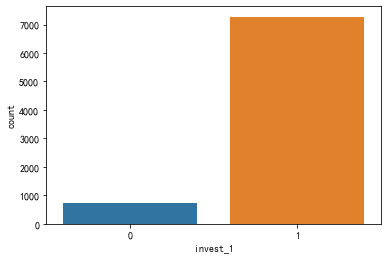

In [89]:
sns.countplot(x='invest_1',data=data)

0无法回答，2-8都没啥用,暂不处理

In [90]:
data.drop(columns=['invest_0','invest_2','invest_3','invest_4','invest_5','invest_6','invest_7','invest_8'],inplace=True)
test.drop(columns=['invest_0','invest_2','invest_3','invest_4','invest_5','invest_6','invest_7','invest_8'],inplace=True)

## marital
目前的婚姻状况:1 = 未婚; 2 = 同居; 3 = 初婚有配偶; 4 = 再婚有配偶; 5 = 分居未离婚; 6 = 离婚; 7 = 丧偶;

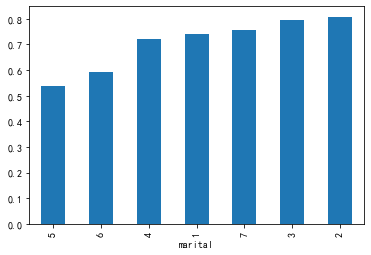

In [91]:
data.groupby('marital').happiness_.mean().sort_values().plot(kind='bar')

婚姻状况为两地分居和离婚的，其幸福感较低。婚姻情况良好幸福感较高。可见，婚姻这一特征对人的幸福感影响较大。

将幸福感相近的婚姻情况进行合并。1,4,7合并为1类，2,3合并为1类。对划分后的数据进行展示。

In [92]:
data.marital.replace([4,1,7],1,inplace=True)
data.marital.replace([3,2],2,inplace=True)
data.marital.replace([5],3,inplace=True)
data.marital.replace([6],4,inplace=True)

test.marital.replace([4,1,7],1,inplace=True)
test.marital.replace([3,2],2,inplace=True)
test.marital.replace([5],3,inplace=True)
test.marital.replace([6],4,inplace=True)

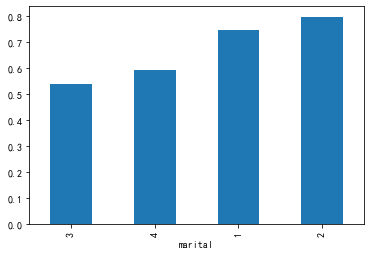

In [93]:
data.groupby('marital').happiness_.mean().sort_values().plot(kind='bar')

## marital_1st、marital_now
您第一次结婚的时间、您与目前的配偶是哪一年结婚的

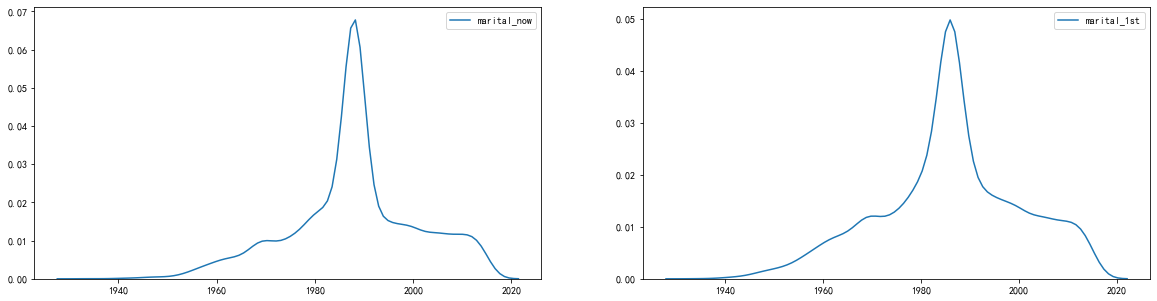

In [94]:
f, ax = plt.subplots(1, 2, figsize=(20, 5))
sns.kdeplot(data.marital_now,ax=ax[0])
sns.kdeplot(data.marital_1st,ax=ax[1])

经观察，其数据分布几乎相同，所以我们只用处理、保留一个就好，而marital_lst缺失程度更少

In [95]:
# print(data[data["marital_1st"]<=1900]["marital_1st"].value_counts())

# 新建特征结婚多少年
data['mar'] = 2015-data.marital_1st
test['mar'] = 2015-test.marital_1st

In [96]:
data.drop(['marital_now','marital_1st'], axis=1, inplace=True)
test.drop(['marital_now','marital_1st'], axis=1, inplace=True)

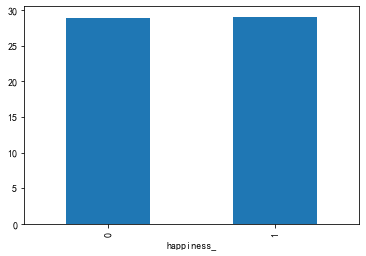

In [97]:
data.groupby('happiness_').mar.mean().plot(kind='bar')

## s_birth、s_edu、s_hukou、s_work_exper
您目前的配偶或同居伴侣是哪一年出生的、您配偶或同居伴侣目前的最高教育程度\您配偶或同居伴侣目前的户口登记状况、您配偶或同居伴侣的工作经历及状况

In [98]:
data.drop(columns=['s_birth','s_edu','s_hukou','s_work_exper'],inplace=True) # 暂不处理
test.drop(columns=['s_birth','s_edu','s_hukou','s_work_exper'],inplace=True)

## f_birth,f_edu,f_political,f_work_14,m_birth,m_edu,m_political,m_work_14
您父亲是哪一年出生的,您父亲的最高教育程度,您父亲的政治面貌 ,您14岁时父亲的就业状况,您母亲是哪一年出生的,您母亲的最高教育程度,您母亲的政治面貌 ,您14岁时母亲的就业状况,

In [99]:
data.drop(columns=['f_birth','f_edu','f_work_14','m_birth','m_edu','m_work_14'],inplace=True) # 暂不处理
test.drop(columns=['f_birth','f_edu','f_work_14','m_birth','m_edu','m_work_14'],inplace=True)

## status_peer
与同龄人相比，本人的社会经济地位怎样 1 = 较高; 2 = 差不多; 3 = 较低;

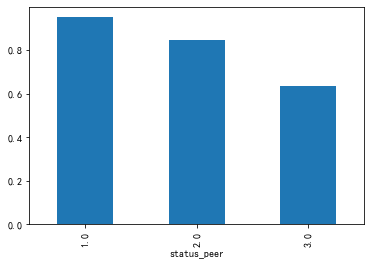

In [100]:
data.groupby('status_peer').happiness_.mean().plot(kind='bar')

社会经济地位较高的，幸福感也较高。不同的社会经济地位，幸福感相差也较大。社会经济地位对幸福感是一个比较重要的特征。

## status_3_before
与三年前相比，社会经济地位发生了什么变化 1 = 上升了; 2 = 差不多; 3 = 下降了;

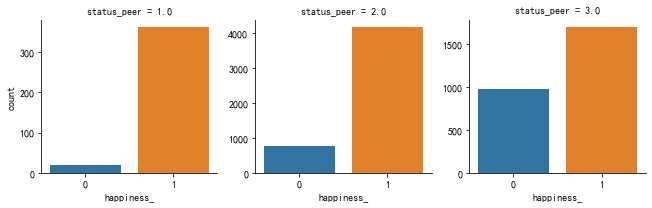

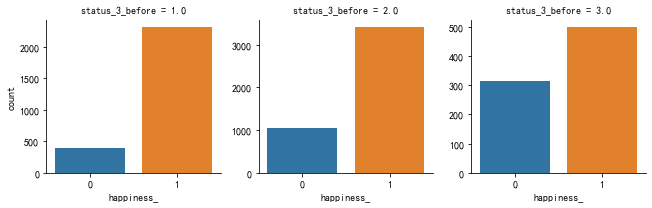

In [101]:
sns.catplot(kind='count',x='happiness_',col='status_peer',col_wrap=3,data=data,sharex=False,sharey=False,height=3)
sns.catplot(kind='count',x='happiness_',col='status_3_before',col_wrap=3,data=data,sharex=False,sharey=False,height=3)

由柱形图可知，与三年前比，生活境况变好的，幸福感指数会更高些。不同的status_3_before值，幸福感差异较大，可知status_3_before对于幸福感是较为重要的特征。

## view
一些重要事情所持的观点和看法与社会大众一致的时候有多少:

1 = 一致的时候非常少; 2 = 一致的时候比较少; 3 = 一般; 4 = 一致的时候比较多; 5 = 一致的时候非常多;

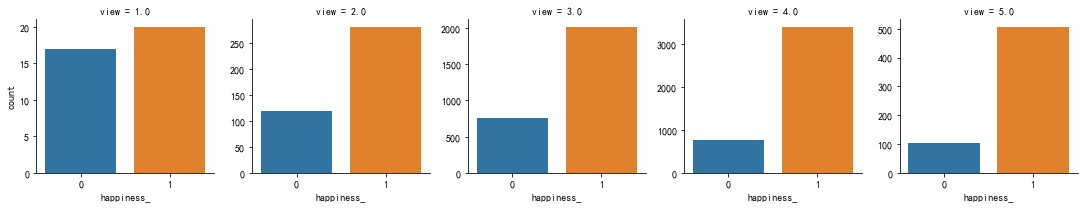

In [102]:
sns.catplot(kind='count',x='happiness_',col='view',col_wrap=5,data=data,sharex=False,sharey=False,height=3)

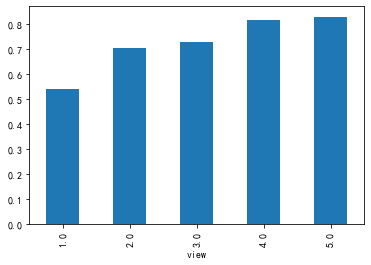

In [103]:
data.groupby('view').happiness_.mean().plot(kind='bar')

周围人对自己的观点的认可度越高，幸福感越高。且不同view对幸福感影响较大，因此view对于幸福感是较为重要的特征。

## inc_ability
考虑到能力和工作状况，目前的收入是否合理 1 = 非常合理; 2 = 合理; 3 = 不合理; 4 = 非常不合理;

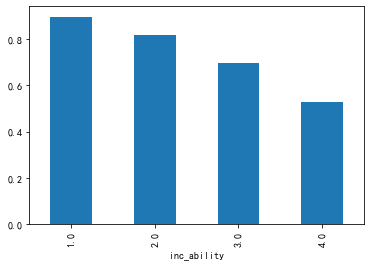

In [104]:
data.groupby('inc_ability').happiness_.mean().plot(kind='bar')

自我感觉收入情况越合理，幸福感越高。且不同inc_ability对幸福感影响较大，因此inc_ability对于幸福感是较为重要的特征。

## inc_exp
您认为您的年收入达到多少元，您才会比较满意

In [105]:
data.drop(columns=['inc_exp'],inplace=True) # 暂不处理
test.drop(columns=['inc_exp'],inplace=True)

## trust_1
在不直接涉及金钱利益接触中的信任度

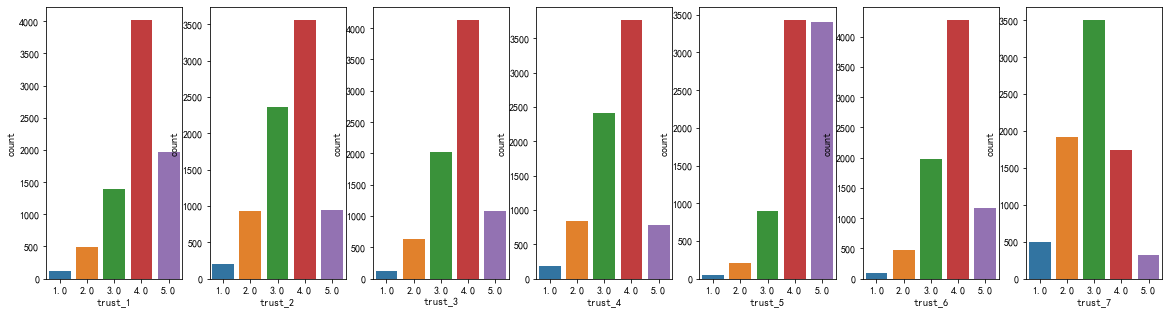

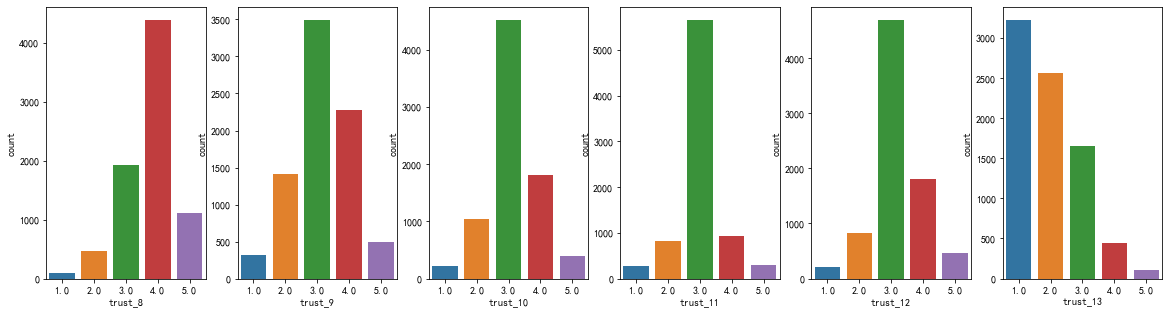

In [106]:
# 在不直接涉及金钱利益接触中的信任度
f, ax = plt.subplots(1, 7, figsize=(20, 5))
sns.countplot(x='trust_1',data=data,ax=ax[0])
sns.countplot(x='trust_2',data=data,ax=ax[1])
sns.countplot(x='trust_3',data=data,ax=ax[2])
sns.countplot(x='trust_4',data=data,ax=ax[3])
sns.countplot(x='trust_5',data=data,ax=ax[4])
sns.countplot(x='trust_6',data=data,ax=ax[5])
sns.countplot(x='trust_7',data=data,ax=ax[6])

f, ax = plt.subplots(1, 6, figsize=(20, 5))
sns.countplot(x='trust_8',data=data,ax=ax[0])
sns.countplot(x='trust_9',data=data,ax=ax[1])
sns.countplot(x='trust_10',data=data,ax=ax[2])
sns.countplot(x='trust_11',data=data,ax=ax[3])
sns.countplot(x='trust_12',data=data,ax=ax[4])
sns.countplot(x='trust_13',data=data,ax=ax[5])

这里似乎可以新建特征，容易信任别人的幸福度是否更高，先暂不处理

## neighbor_familiarity
您和邻居，街坊/同村其他居民互相之间的熟悉程度

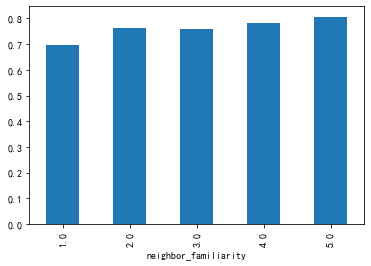

In [107]:
data.groupby('neighbor_familiarity').happiness_.mean().plot(kind='bar')

## public_service_1,public_service_2,public_service_3,public_service_4,public_service_5,public_service_6,public_service_7,public_service_8,public_service_9

In [108]:
cols = ['public_service_1','public_service_2','public_service_3','public_service_4','public_service_5',
        'public_service_6','public_service_7','public_service_8','public_service_9']

In [109]:
# 对数据进行分段处理
def groups(row):
    if row <20:
        return 1
    elif row < 40:
        return 2
    elif row < 60:
        return 3
    elif row < 80:
        return 4
    else :
        return 5

for col in cols:
    data[col]= data[col].apply(groups)

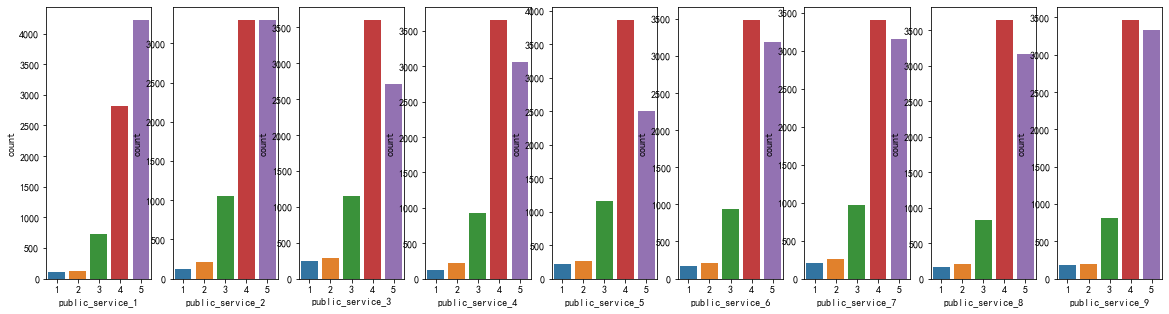

In [110]:
f, ax = plt.subplots(1, 9, figsize=(20, 5))
sns.countplot(x='public_service_1',data=data,ax=ax[0])
sns.countplot(x='public_service_2',data=data,ax=ax[1])
sns.countplot(x='public_service_3',data=data,ax=ax[2])
sns.countplot(x='public_service_4',data=data,ax=ax[3])
sns.countplot(x='public_service_5',data=data,ax=ax[4])
sns.countplot(x='public_service_6',data=data,ax=ax[5])
sns.countplot(x='public_service_7',data=data,ax=ax[6])
sns.countplot(x='public_service_8',data=data,ax=ax[7])
sns.countplot(x='public_service_9',data=data,ax=ax[8])

可以慢慢细分观察，这里暂时先不处理

# 特征工程

In [111]:
# 拆出训练集
train_x = data.drop(columns=['happiness','happiness_'])

# 拆出标签
train_y = data.happiness

In [112]:
print(train_x.shape)
print(train_y.shape)

(7988, 94)
(7988,)


In [113]:
train_x.to_csv('./train_x.csv')
test.to_csv('./test.csv')

In [114]:
adfs

NameError: name 'adfs' is not defined

## 特征选择
使用基于随机森林的嵌入法来计算特征的重要程度，去除相关性较弱的特征。

In [ ]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(n_estimators=100, random_state=10)
clf = clf.fit(train_x,train_y)

In [ ]:
from sklearn.feature_selection import SelectFromModel
model = SelectFromModel(clf, prefit=True, threshold='median')

In [ ]:
cols = train_x.columns[model.get_support()] # 保留相关性较强的特征。
train_x = train_x[cols]
test = test[cols]

In [ ]:
# 热力图
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False 
colormap = plt.cm.viridis
plt.figure(figsize=(14,14))
sns.heatmap(train_x.corr(),vmax=1.0,cmap=colormap, linecolor='white', annot=True)

## 特征变换
对于严重偏态的数据，对数化处理。

有些特征量纲较大，因此对数值型数据进行标准化处理。

In [ ]:
# 零均值化，归一化方差
cols = ["floor_area","height_cm","mar"]
for col in cols:
    train_x[cols] = (train_x[cols]-train_x[cols].mean())/train_x[cols].std()
    test[cols] = (test[cols]-test[cols].mean())/test[cols].std()

# 模型选择

In [ ]:
from sklearn.linear_model import Ridge,LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings('ignore')

models = []
models.append(['Ridge',Ridge()])
models.append(['LogisticRegression',LogisticRegression()])
models.append(['RandomForestRegressor',RandomForestRegressor()])
models.append(['GradientBoostingRegressor',GradientBoostingRegressor()])

In [ ]:
from sklearn.model_selection import cross_val_score,KFold

for regName,reg in models:
    print(regName,':')
    kf = KFold(n_splits=10,shuffle=True,random_state=10).get_n_splits(train_x)
    rmse = -cross_val_score(reg,train_x,train_y,scoring="neg_mean_squared_error", cv = kf)
    print(np.mean(rmse))

GBDT初始化的效果最好，对其进行调参优化。

# 模型调参

## GridSearchCV

In [ ]:
## GridSearchCV
# GridSearchCV，它存在的意义就是自动调参，只要把参数输进去，就能给出最优化的结果和参数。但是这个方法适合于小数据集

### 格式
# sklearn.model_selection.GridSearchCV(estimator, param_grid, scoring=None, fit_params=None, n_jobs=1, iid=True, refit=True, cv=None, verbose=0, pre_dispatch=‘2*n_jobs’, error_score=’raise’, return_train_score=’warn’)

### 参数说明
# estimator：选择使用的分类器，并且传入除需要确定最佳的参数之外的其他参数。每一个分类器都需要一个scoring参数
# param_grid：需要最优化的参数的取值，值为字典或者列表
# coring：模型评价标准，默认None,根据所选模型不同，评价准则不同。最后附评分表
# n_jobs=1: 并行数，int：个数,-1：跟CPU核数一致
# iid: 默认True,为True时，默认为各个样本fold概率分布一致，误差估计为所有样本之和，而非各个fold的平均。
# refit：默认为True,程序将会以交叉验证训练集得到的最佳参数，重新对所有可用的训练集与开发集进行
# cv：交叉验证参数，默认None，使用三折交叉验证。
# verbose=0 ：日志冗长度，int：冗长度，0：不输出训练过程，1：偶尔输出，>1：对每个子模型都输出。
# pre_dispatch=‘2*n_jobs’：指定总共分发的并行任务数。当n_jobs大于1时，数据将在每个运行点进行复制，这可能导致OOM，而设置pre_dispatch参数，则可以预先划分总共的job数量，使数据最多被复制pre_dispatch次
# return_train_score=’warn’：如果“False”，cv_results_属性将不包括训练分数

### 属性
# best_estimator_：通过搜索选择的估计器，即在左侧数据上给出最高分数（或指定的最小损失）的估计器。 如果refit = False，则不可用。
# best_score_：best_estimator的分数
# best_params_：描述了已取得最佳结果的参数的组合

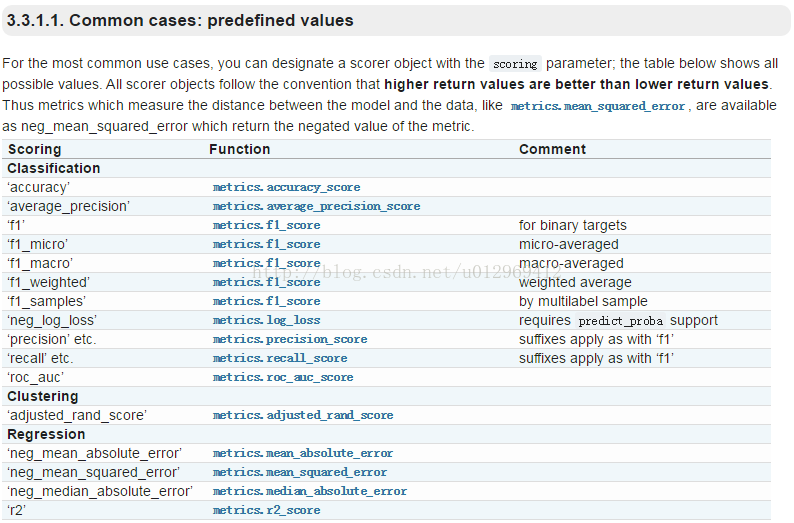

调整学习率(learning rate) 和 迭代次数(n_estimator)，将学习率初始值设为0.1，便于快速迭代。

In [ ]:
from sklearn.model_selection import GridSearchCV

gbdt = GradientBoostingRegressor(learning_rate=0.1,min_samples_split=300,min_samples_leaf=20,max_depth=8,max_features='sqrt',
                                subsample=0.8,random_state=10)
param_1 = {'n_estimators':range(1,102,10)}
cv = GridSearchCV(estimator=gbdt,param_grid=param_1,scoring='neg_mean_squared_error',iid=False,cv=5)
cv.fit(train_x,train_y)
print('best_params_：',cv.best_params_)
print('best_score_：',cv.best_score_)

接下来对决策树进行调参： 

调整决策树最大深度(max_depth)和内部节点划分所需最小样本数(min_samples_split)。

In [ ]:
gbdt=GradientBoostingRegressor(learning_rate=0.1,n_estimators=75,min_samples_split=350,min_samples_leaf=20, 
                                     max_depth=5, max_features='sqrt',subsample=0.8, random_state=10)
param_2 = {'max_depth': range(5,7,1), 'min_samples_split': range(100,200,20)}                             
cv = GridSearchCV(estimator=gbdt,param_grid=param_2,scoring='neg_mean_squared_error', iid=False, cv=5)                
cv.fit(train_x, train_y)                                                                                        
print('best_params:{0}'.format(cv.best_params_)) 
print('best_score:{0}'.format(cv.best_score_))

先定下最大深度，但min_samples_split和min_samples_leaf还有关联，一起调参。

In [ ]:
gbdt=GradientBoostingRegressor(learning_rate=0.1,n_estimators=75,min_samples_split=100,min_samples_leaf=20, 
                               max_depth=5, max_features='sqrt',subsample=0.8, random_state=10)
param_3 = {'min_samples_split':range(160,200,20), 'min_samples_leaf':range(14,20,2)}               
cv = GridSearchCV(estimator=gbdt,param_grid=param_3, 
                                   scoring='neg_mean_squared_error', iid=False, cv=5)       
cv.fit(train_x, train_y)                                                                               
print('best_params:{0}'.format(cv.best_params_))                                                      
print('best_score:{0}'.format(cv.best_score_))

最后可通过减小学习率，增大迭代次数，保持两者的乘积基本不变，以增加泛化能力防止过拟合。

In [140]:
from sklearn.ensemble import GradientBoostingRegressor
params = {
    'learning_rate':0.01, 
    'n_estimators':600, 
    'max_depth':8,
    'min_samples_leaf':18,
    'min_samples_split':180,
    'max_features':'sqrt', 
    'subsample':0.8, 
    'random_state':10}

gbdt = GradientBoostingRegressor(**params)
gbdt.fit(train_x,train_y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=8,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=18, min_samples_split=180,
                          min_weight_fraction_leaf=0.0, n_estimators=600,
                          n_iter_no_change=None, presort='auto',
                          random_state=10, subsample=0.8, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

## 绘制学习曲线

In [141]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator,title,x,y,cv=5,n_jobs=4):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("mean_squared_error")
    train_sizes, train_scores, test_scores = learning_curve(estimator, x, y, cv=cv, scoring="neg_mean_squared_error",n_jobs=n_jobs)
    
    train_scores_mean = -np.mean(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",label="Cross-validation score")

    plt.legend(loc="best")
    return plt

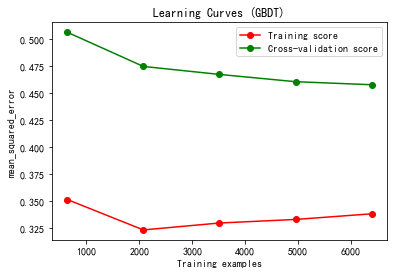

In [142]:
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = gbdt
plot_learning_curve(estimator, "Learning Curves (GBDT)", train_x, train_y, cv=cv, n_jobs=4)
plt.show()

训练集MSE较低，测试集MSE较高，说明数据过拟合。应减少特征数量，调整模型参数以防止过拟合

## 特征重要性

In [ ]:
feature_importance = gbdt.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig=plt.figure(figsize=(10,15))
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, train_x.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [143]:
y_hat = gbdt.predict(test)

In [144]:
happiness_submit = pd.read_csv('./datas/happiness_submit.csv')
happiness_submit['happiness'] =y_hat
happiness_submit.head(20)

,id,happiness
0,8001,3.982926
1,8002,2.974247
2,8003,3.486423
3,8004,4.337026
4,8005,3.575107
5,8006,4.330367
6,8007,4.039569
7,8008,4.353465
8,8009,4.040061
9,8010,3.285152


# 保存结果

In [145]:
happiness_submit.to_csv("gbdt_happiness.csv",index=False)

# 总结
- **1.预测结果：**
    绘制学习曲线后，发现有严重的过拟合现象。因此需对特征和模型参数进行调整，或换用其它模型进行预测对比，以求最优解。
    
- **2.分析结果(简要分析影响幸福感的重要因素)：**
    个人资产(收入，房产，户口等)对幸福感影响较小。资产多少仅表示个人活法不同，而要提升幸福感，则需要多关注身心健康，教育等。
    婚姻，家境等是影响幸福感的重要因素。家境好的普遍幸福感也较高，另外婚姻破裂的家庭幸福感极低。
    所处阶级，公平程度，观点认可度等对幸福感影响较大，而社会态度中的诸多因素相比个体和家庭则更具影响力。